In [6]:
from functions import *

paths = {
        "df1": "C:/Users/osanc/Desktop/IronHack/Sem_3/Proyecto/pip.csv",
        "df3": "C:/Users/osanc/Desktop/IronHack/Sem_3/Proyecto/expected-years-of-schooling-vs-share-in-extreme-poverty.csv",
        "df5": "C:/Users/osanc/Desktop/IronHack/Sem_3/Proyecto/total-government-expenditure-on-education-gdp.csv",
        "df6": "C:/Users/osanc/Desktop/IronHack/Sem_3/Proyecto/country-coord.csv"
    }

## Procesamiento de datos

In [7]:
#cargar datos
dfs = load_data(paths)

In [8]:
#limpiar columnas
df1, df3, df5, df6 = clean_columns(dfs["df1"], dfs["df3"], dfs["df5"], dfs["df6"])

In [9]:
#unir DataFrames
df_merged = merge_dfs(df1, df3, df5, df6)

In [10]:
#Limite investigacion
df_merged = limit_analitic(df_merged)

In [11]:
#Limpieza de valores nulos

df_merged = clean_nulls(df_merged)

In [12]:
#convertir formato fecha

df_merged = convertir_anio_a_fecha(df_merged, 'reporting_year')

In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, 0 to 2498
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   region_name             1633 non-null   object        
 1   region_code             1633 non-null   object        
 2   country_name            1633 non-null   object        
 3   country_code            1633 non-null   object        
 4   reporting_year          1633 non-null   datetime64[ns]
 5   gini                    1633 non-null   float64       
 6   poverty_line            1633 non-null   float64       
 7   headcount               1633 non-null   float64       
 8   poverty_gap             1633 non-null   float64       
 9   reporting_pop           1633 non-null   float64       
 10  reporting_gdp           1633 non-null   float64       
 11  codigo                  1633 non-null   object        
 12  expected_years_school   1633 non-null   float64      

In [14]:
df_merged.groupby(["region_name","country_name"]).agg({
    'gini': 'mean',
    'headcount': 'mean',
    "expected_years_school":"mean",
    "spend_public_education":"mean"})

gini  headcount  expected_years_school  \
region_name         country_name                                               
East Asia & Pacific China         0.374060   0.086152              13.356753   
                    Fiji          0.364703   0.010968              12.932265   
                    Indonesia     0.347737   0.191878              12.409637   
                    Kiribati      0.324029   0.078526              11.507210   
                    Lao PDR       0.356868   0.157365               9.709502   
...                                    ...        ...                    ...   
Sub-Saharan Africa  Tanzania      0.389637   0.574702               8.038986   
                    Togo          0.434559   0.507458              11.833109   
                    Uganda        0.431303   0.486310              10.753057   
                    Zambia        0.517891   0.614689              10.192226   
                    Zimbabwe      0.459157   0.318469              10.931360   

                                  spend_public_education  
region_name         country_name                          
East Asia & Pacific China                       3.679022  
                    Fiji                        4.882503  
                    Indonesia                   3.049577  
                    Kiribati                   13.574123  
                    Lao PDR                     2.515031  
...                                                  ...  
Sub-Saharan Africa  Tanzania                    4.103620  
                    Togo                        3.387463  
                    Uganda                      2.081214  
                    Zambia                      3.501255  
                    Zimbabwe                    5.448304  

[147 rows x 4 columns]

## Grafico 1

In [33]:
import nbformat
print(nbformat.__version__)

import plotly.io as pio
pio.renderers.default = 'notebook'

import plotly.express as px


# Crear el mapa
fig = px.scatter_geo(df_merged,
                     lat='latitude',
                     lon='longitude',
                     hover_name='country_name',  # Nombre del país al pasar el mouse
                     size='gini',     # Tamaño de los puntos basado en el índice de Gini
                     color='gini',    # Color basado en el índice de Gini
                     color_continuous_scale='Viridis',  # Escala de color
                     projection="natural earth")  # Proyección del mapa

# Título y mostrar el mapa
fig.update_layout(title="Índice de Gini por Países")
fig.show()

5.9.2


## Grafico 2

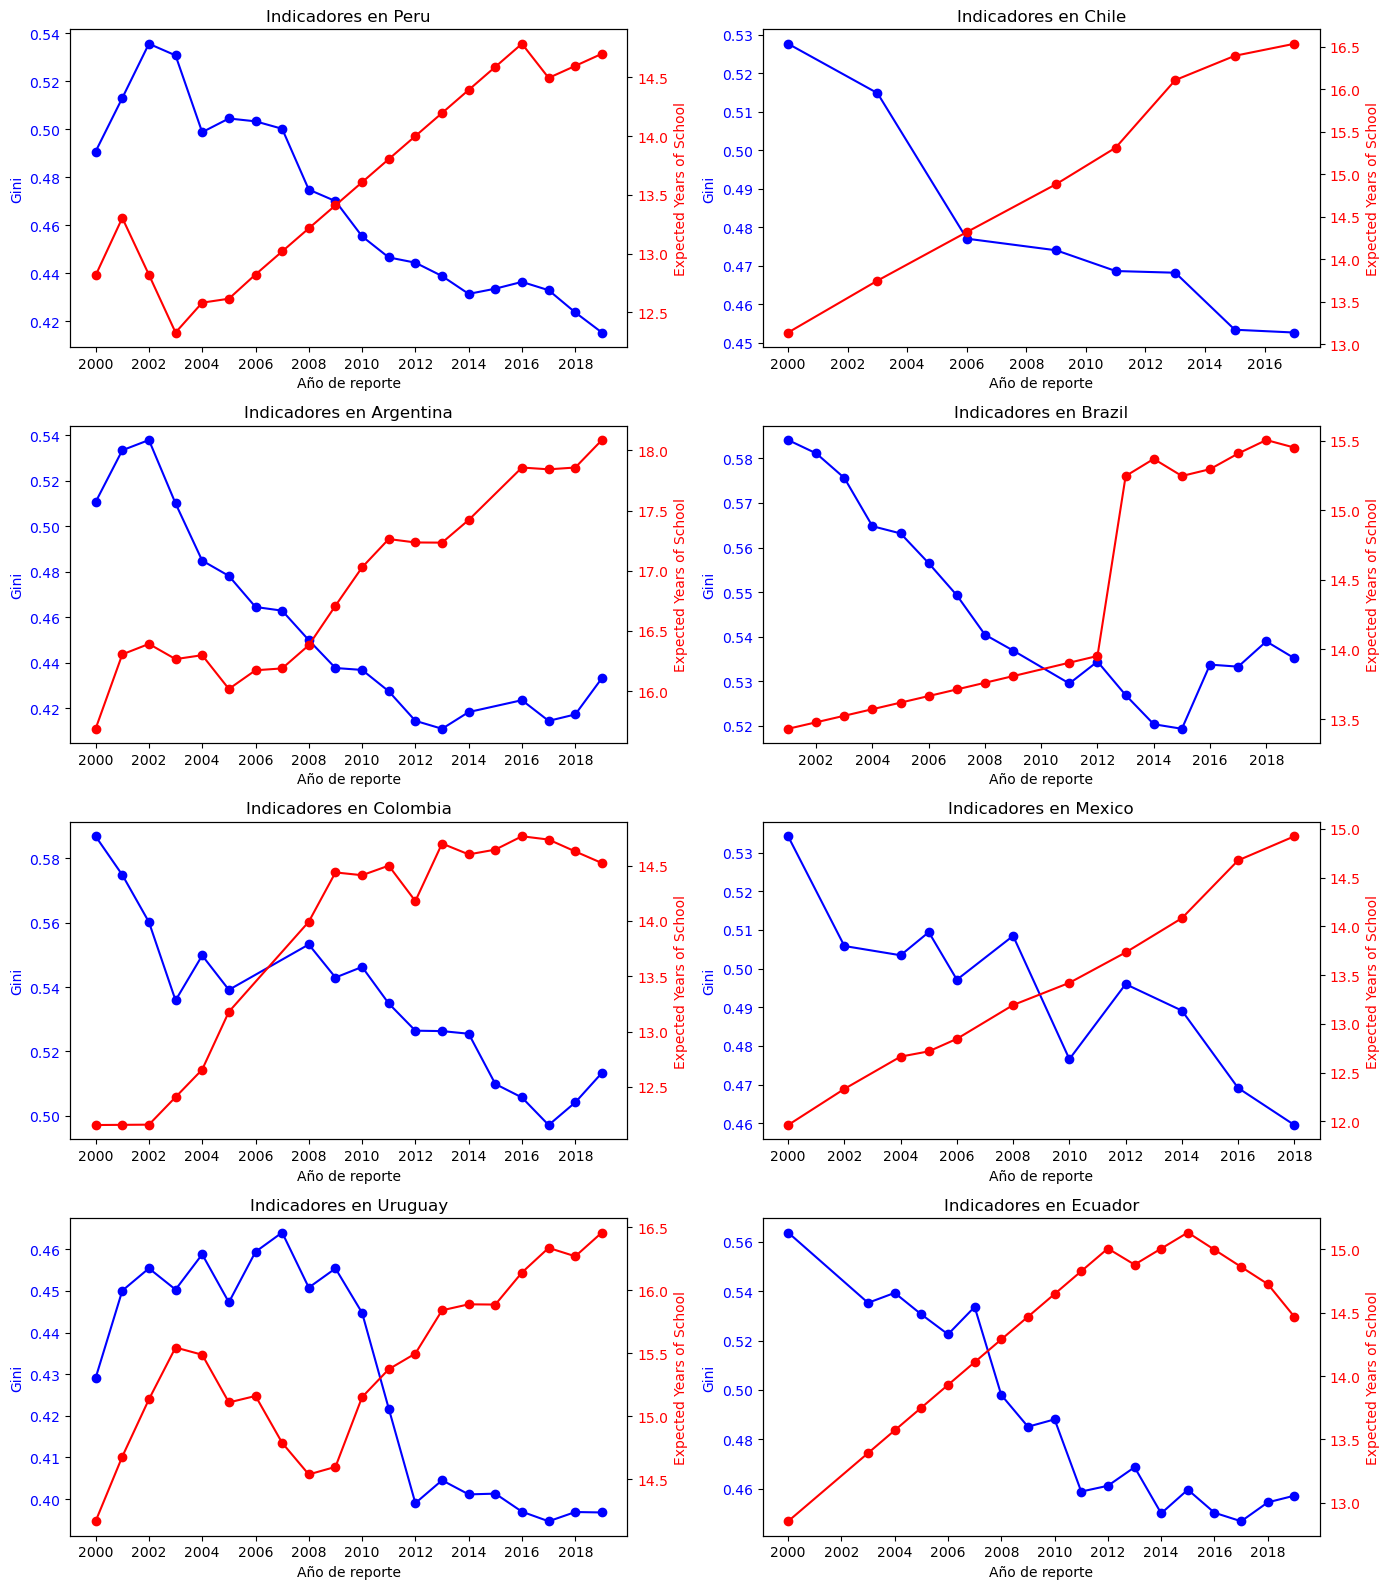

In [25]:
import matplotlib.pyplot as plt

# Lista de países a incluir en el análisis
paises = ['Peru', 'Chile', 'Argentina', 'Brazil', 'Colombia', 'Mexico', 'Uruguay', 'Ecuador']

# Filtrar el DataFrame para los países seleccionados
df_filtered = df_merged[df_merged['country_name'].isin(paises)]

# Crear la estructura de subplots (en este caso 4 filas, 2 columnas para 8 países)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()  # Convertir el array de ejes en una lista plana para fácil acceso

# Iterar a través de los países y crear un gráfico para cada uno
for i, pais in enumerate(paises):
    # Filtrar los datos para el país específico
    df_pais = df_filtered[df_filtered['country_name'] == pais]

    # Derretir el DataFrame para crear la tabla dinámica como antes
    df_pivot = df_pais.melt(id_vars=['country_name', 'reporting_year'], 
                            value_vars=['gini', 'expected_years_school'], 
                            var_name='indicator')

    # Crear la tabla dinámica
    result = df_pivot.pivot_table(index='indicator', columns='reporting_year', values='value')

    # Seleccionar el eje actual
    ax1 = axes[i]

    # Graficar el primer indicador ('gini') en el eje principal (ax1)
    ax1.plot(result.columns, result.loc['gini'], marker='o', color='b', label='Gini')

    # Añadir etiquetas para el primer eje
    ax1.set_xlabel('Año de reporte')
    ax1.set_ylabel('Gini', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Crear un segundo eje (ax2) que comparte el mismo eje x con ax1
    ax2 = ax1.twinx()

    # Graficar el segundo indicador ('expected_years_school') en el eje secundario (ax2)
    ax2.plot(result.columns, result.loc['expected_years_school'], marker='o', color='r', label='Expected Years of School')

    # Añadir etiquetas para el segundo eje
    ax2.set_ylabel('Expected Years of School', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Título del subgráfico para el país
    ax1.set_title(f'Indicadores en {pais}')

# Ajustar el layout para que los subgráficos no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Grafico 3

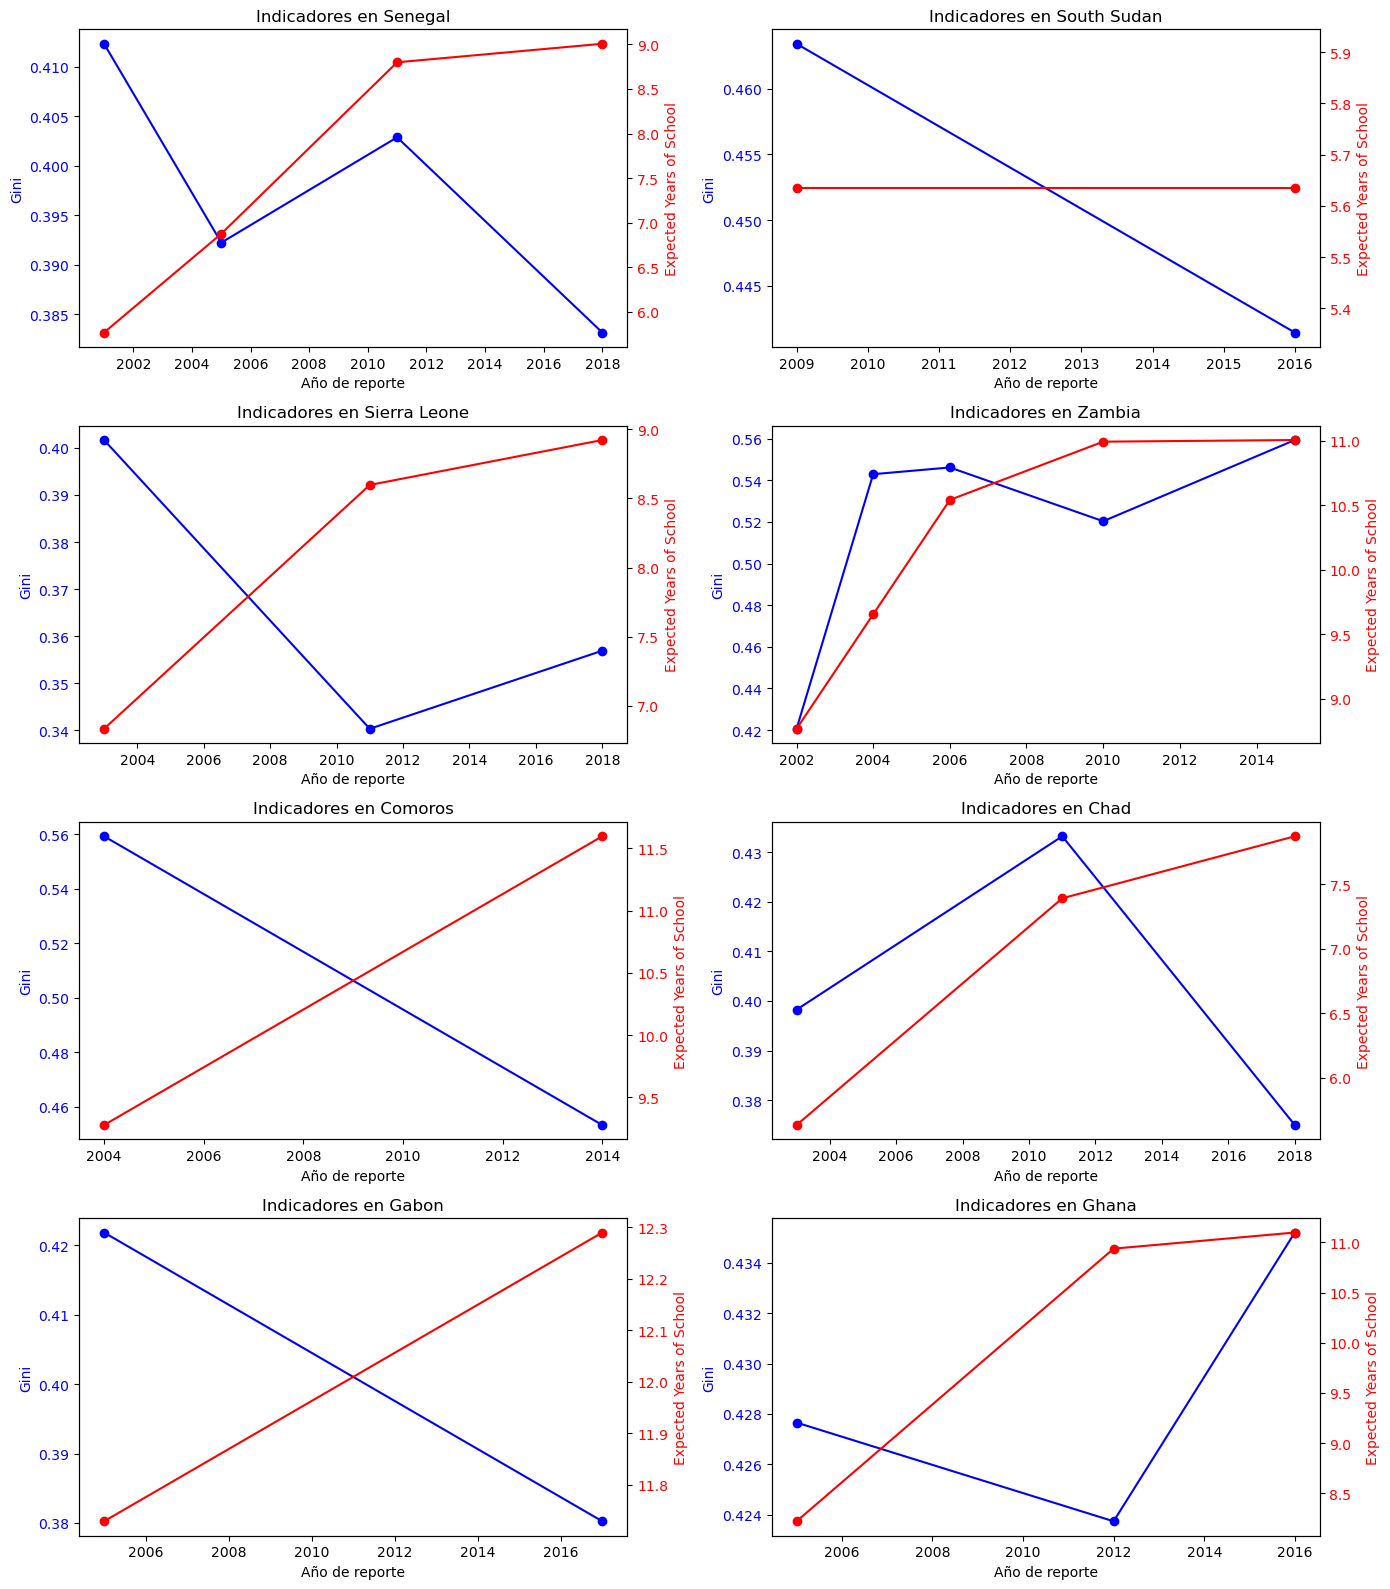

In [26]:
import matplotlib.pyplot as plt

# Lista de países a incluir en el análisis
paises = ['Senegal', 'South Sudan', 'Sierra Leone', 'Zambia', 'Comoros', 'Chad', 'Gabon', 'Ghana']

# Filtrar el DataFrame para los países seleccionados
df_filtered = df_merged[df_merged['country_name'].isin(paises)]

# Crear la estructura de subplots (en este caso 4 filas, 2 columnas para 8 países)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()  # Convertir el array de ejes en una lista plana para fácil acceso

# Iterar a través de los países y crear un gráfico para cada uno
for i, pais in enumerate(paises):
    # Filtrar los datos para el país específico
    df_pais = df_filtered[df_filtered['country_name'] == pais]

    # Derretir el DataFrame para crear la tabla dinámica como antes
    df_pivot = df_pais.melt(id_vars=['country_name', 'reporting_year'], 
                            value_vars=['gini', 'expected_years_school'], 
                            var_name='indicator')

    # Crear la tabla dinámica
    result = df_pivot.pivot_table(index='indicator', columns='reporting_year', values='value')

    # Seleccionar el eje actual
    ax1 = axes[i]

    # Graficar el primer indicador ('gini') en el eje principal (ax1)
    ax1.plot(result.columns, result.loc['gini'], marker='o', color='b', label='Gini')

    # Añadir etiquetas para el primer eje
    ax1.set_xlabel('Año de reporte')
    ax1.set_ylabel('Gini', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Crear un segundo eje (ax2) que comparte el mismo eje x con ax1
    ax2 = ax1.twinx()

    # Graficar el segundo indicador ('expected_years_school') en el eje secundario (ax2)
    ax2.plot(result.columns, result.loc['expected_years_school'], marker='o', color='r', label='Expected Years of School')

    # Añadir etiquetas para el segundo eje
    ax2.set_ylabel('Expected Years of School', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Título del subgráfico para el país
    ax1.set_title(f'Indicadores en {pais}')

# Ajustar el layout para que los subgráficos no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Grafico 4

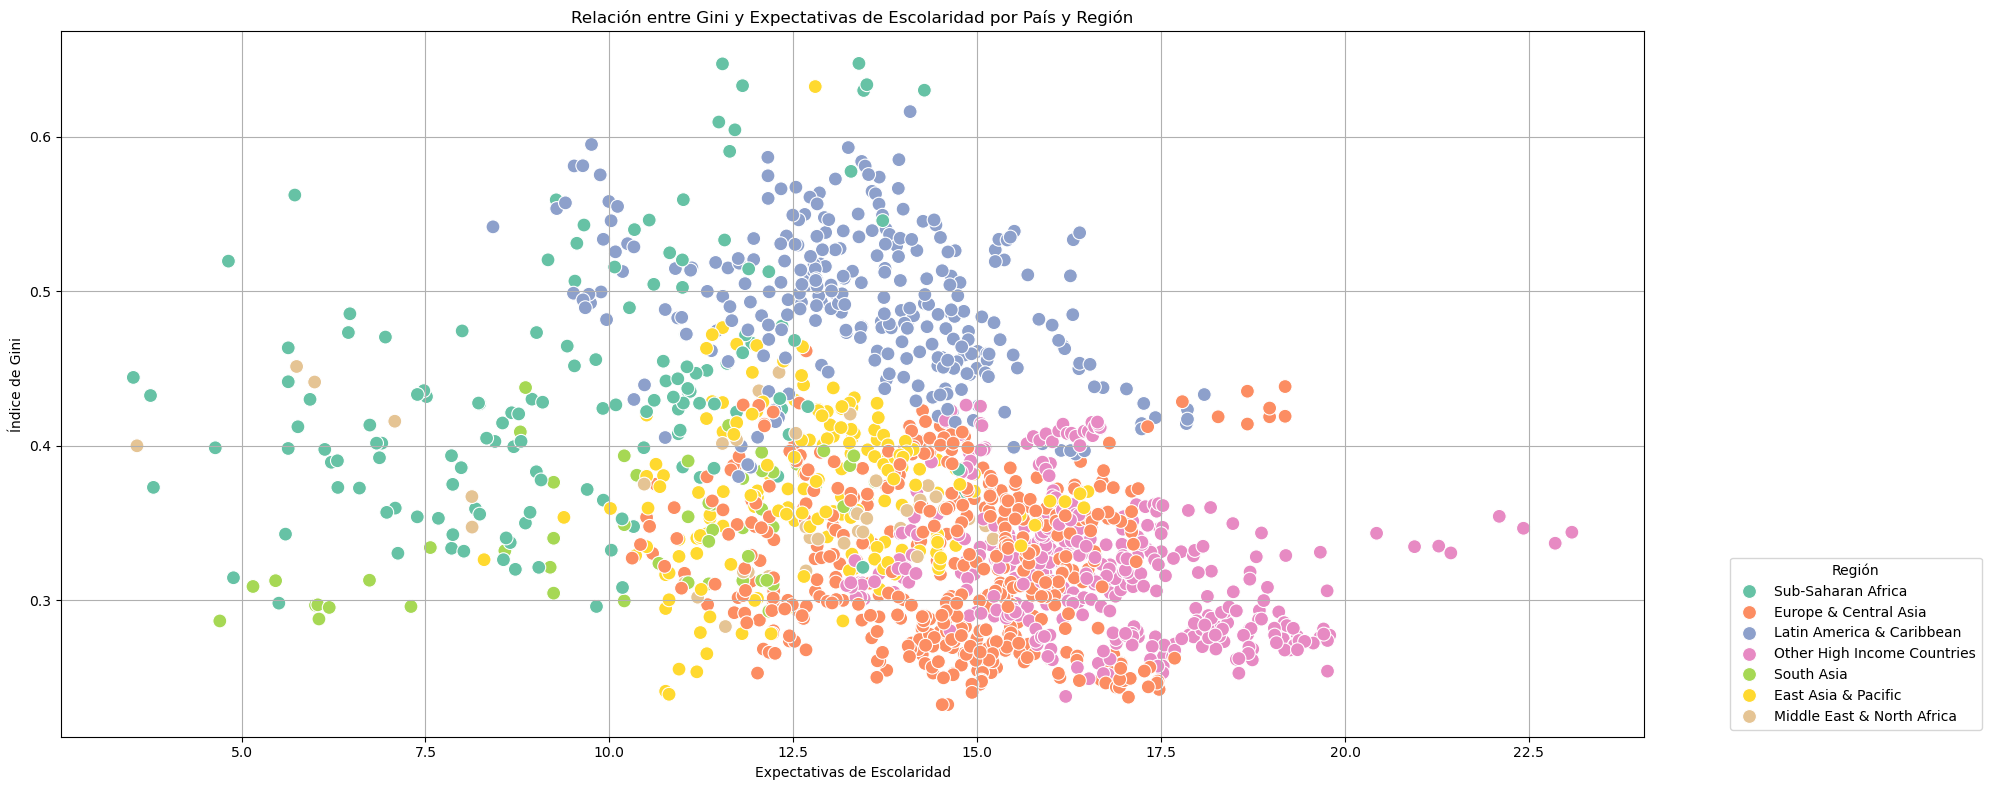

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las columnas necesarias
df_filtered = df_merged[['country_name', 'gini', 'expected_years_school', 'region_name']].dropna()

# Crear el gráfico de dispersión
plt.figure(figsize=(20, 8))
scatter_plot = sns.scatterplot(data=df_filtered, 
                x='expected_years_school', 
                y='gini', 
                hue='region_name',   # Color según la región
                s=100,  # Tamaño de los puntos
                palette='Set2')  # Paleta de colores para regiones

# Añadir título y etiquetas
plt.title('Relación entre Gini y Expectativas de Escolaridad por País y Región')
plt.xlabel('Expectativas de Escolaridad')
plt.ylabel('Índice de Gini')

# Configurar la leyenda
plt.legend(title='Región', bbox_to_anchor=(1.05, 0), loc='lower left')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()  # Ajustar el diseño para que no se corte la leyenda
plt.show()

## Grafico 5

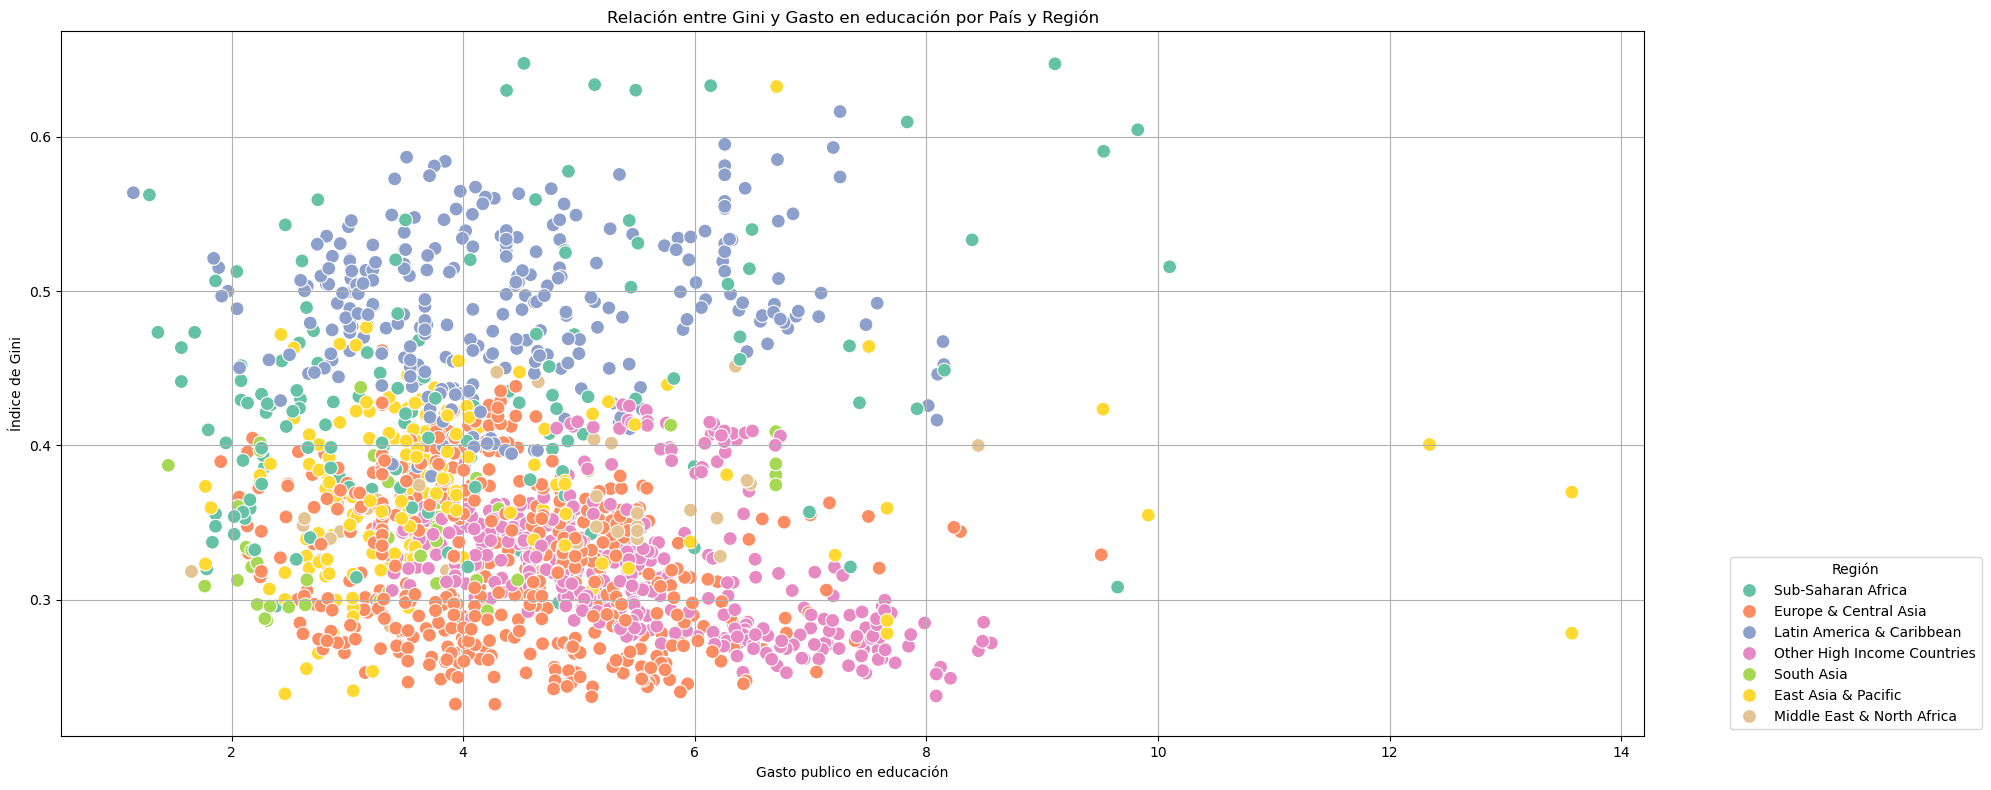

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las columnas necesarias
df_filtered = df_merged[['country_name', 'gini', 'spend_public_education', 'region_name']].dropna()

# Crear el gráfico de dispersión
plt.figure(figsize=(20, 8))
scatter_plot = sns.scatterplot(data=df_filtered, 
                x='spend_public_education', 
                y='gini', 
                hue='region_name',   # Color según la región
                s=100,  # Tamaño de los puntos
                palette='Set2')  # Paleta de colores para regiones

# Añadir título y etiquetas
plt.title('Relación entre Gini y Gasto en educación por País y Región')
plt.xlabel('Gasto publico en educación')
plt.ylabel('Índice de Gini')

# Configurar la leyenda
plt.legend(title='Región', bbox_to_anchor=(1.05, 0), loc='lower left')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()  # Ajustar el diseño para que no se corte la leyenda
plt.show()

## Grafico 6

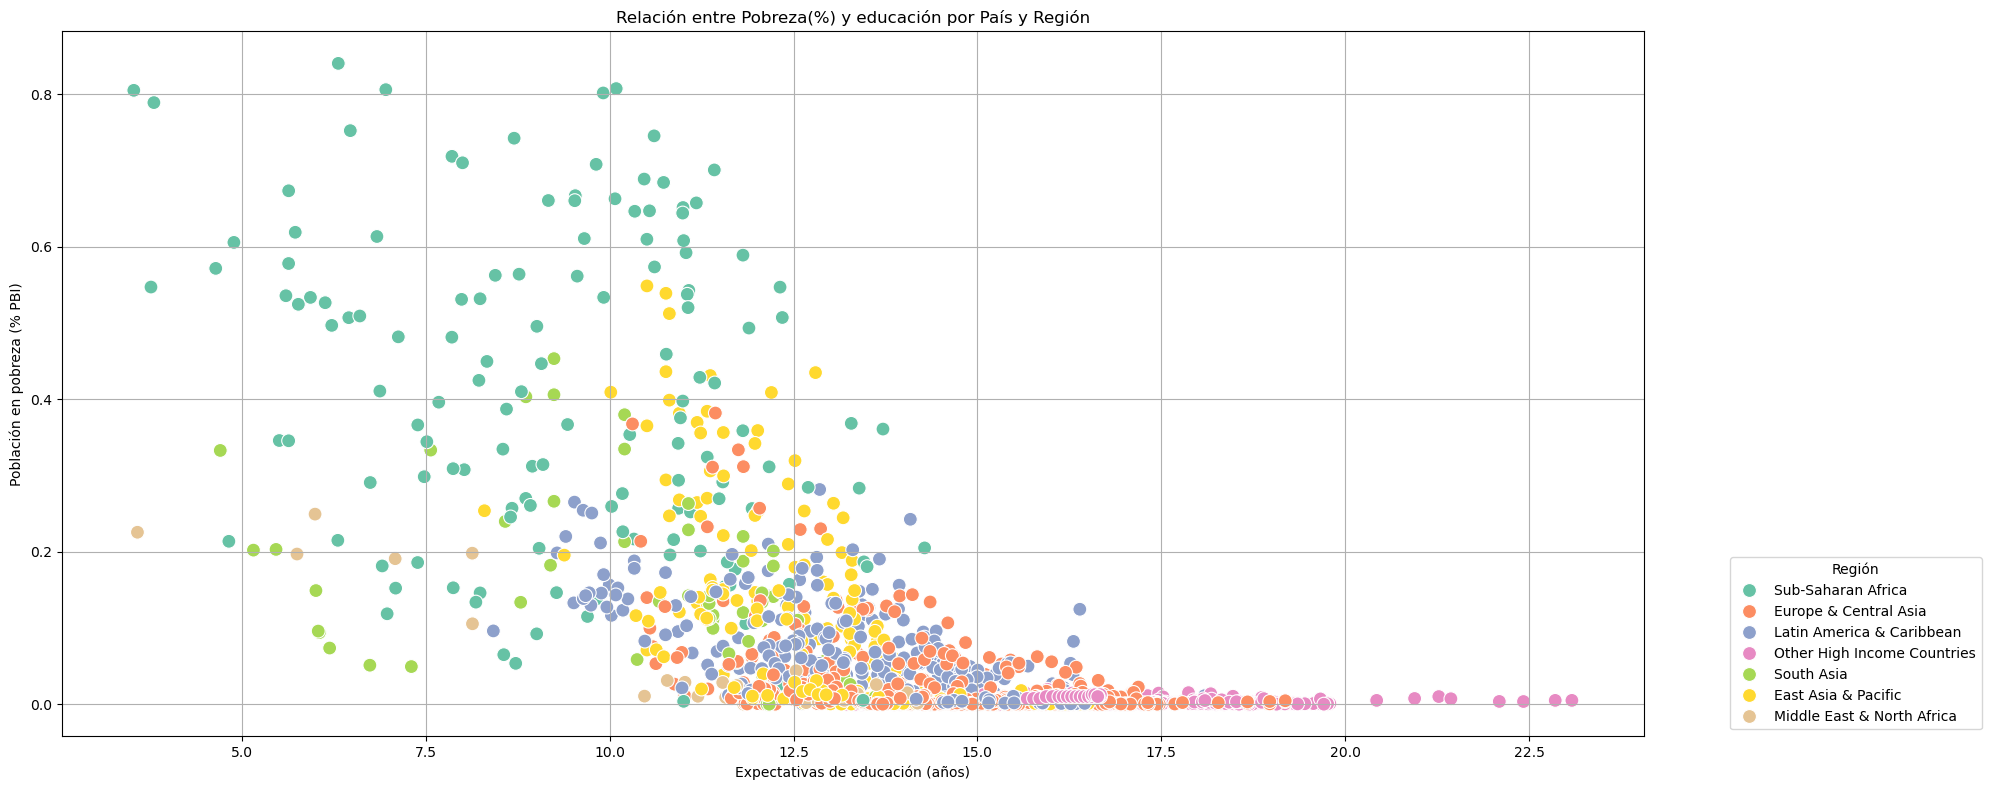

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar las columnas necesarias
df_filtered = df_merged[['country_name','expected_years_school', 'headcount', 'region_name']].dropna()

# Crear el gráfico de dispersión
plt.figure(figsize=(20, 8))
scatter_plot = sns.scatterplot(data=df_filtered, 
                x='expected_years_school', 
                y='headcount', 
                hue='region_name',   # Color según la región
                s=100,  # Tamaño de los puntos
                palette='Set2')  # Paleta de colores para regiones

# Añadir título y etiquetas
plt.title('Relación entre Pobreza(%) y educación por País y Región')
plt.xlabel('Expectativas de educación (años)')
plt.ylabel('Población en pobreza (% PBI)')

# Configurar la leyenda
plt.legend(title='Región', bbox_to_anchor=(1.05, 0), loc='lower left')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()  # Ajustar el diseño para que no se corte la leyenda
plt.show()

## Grafico 7

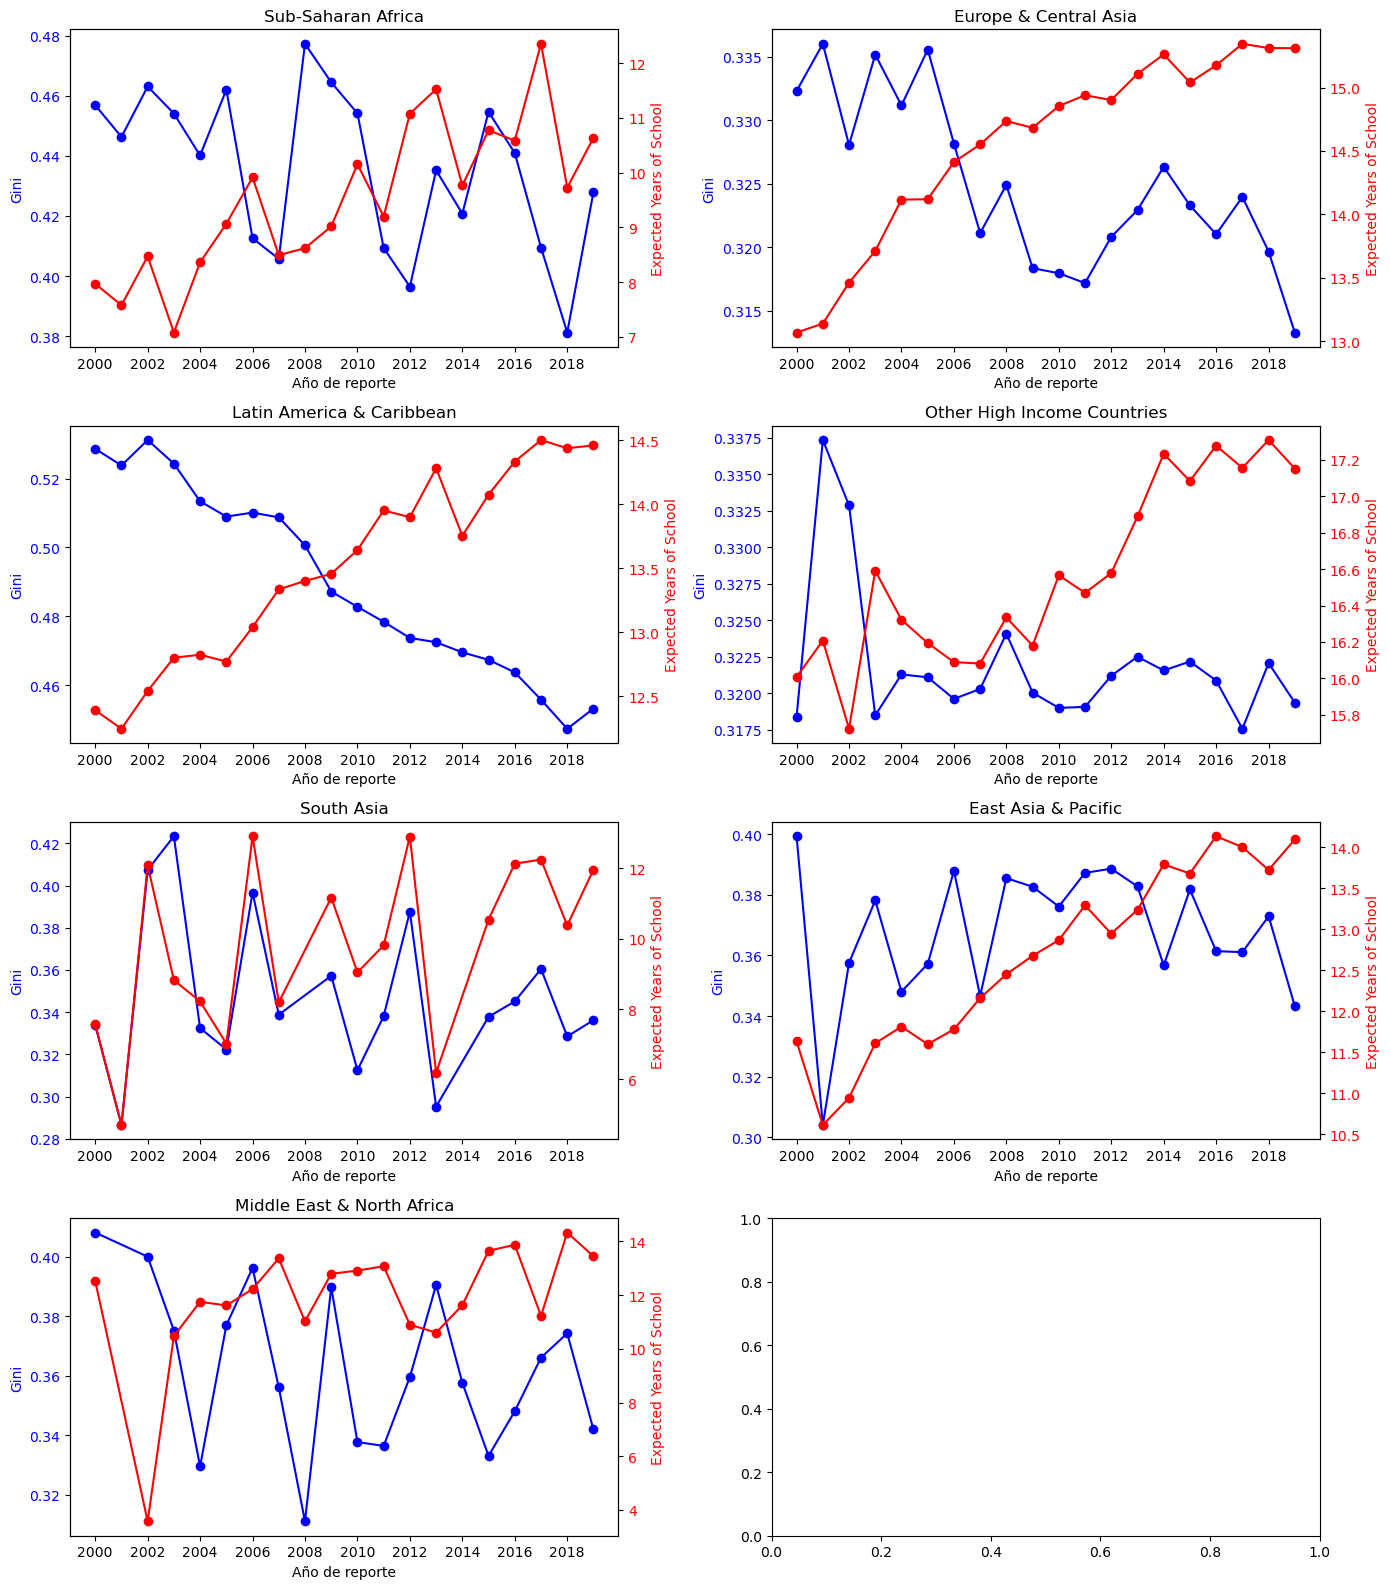

In [37]:
import matplotlib.pyplot as plt

# Lista de países a incluir en el análisis
regiones = ['Sub-Saharan Africa', 'Europe & Central Asia', 'Latin America & Caribbean', 'Other High Income Countries', 'South Asia', 'East Asia & Pacific', 'Middle East & North Africa']

# Filtrar el DataFrame para los países seleccionados
df_filtered = df_merged[df_merged['region_name'].isin(regiones)]

# Crear la estructura de subplots (en este caso 4 filas, 2 columnas para 8 países)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()  # Convertir el array de ejes en una lista plana para fácil acceso

# Iterar a través de los países y crear un gráfico para cada uno
for i, region in enumerate(regiones):
    # Filtrar los datos para el país específico
    df_pais = df_filtered[df_filtered['region_name'] == region]

    # Derretir el DataFrame para crear la tabla dinámica como antes
    df_pivot = df_pais.melt(id_vars=['region_name', 'reporting_year'], 
                            value_vars=['gini', 'expected_years_school'], 
                            var_name='indicator')

    # Crear la tabla dinámica
    result = df_pivot.pivot_table(index='indicator', columns='reporting_year', values='value')

    # Seleccionar el eje actual
    ax1 = axes[i]

    # Graficar el primer indicador ('gini') en el eje principal (ax1)
    ax1.plot(result.columns, result.loc['gini'], marker='o', color='b', label='Gini')

    # Añadir etiquetas para el primer eje
    ax1.set_xlabel('Año de reporte')
    ax1.set_ylabel('Gini', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Crear un segundo eje (ax2) que comparte el mismo eje x con ax1
    ax2 = ax1.twinx()

    # Graficar el segundo indicador ('expected_years_school') en el eje secundario (ax2)
    ax2.plot(result.columns, result.loc['expected_years_school'], marker='o', color='r', label='Expected Years of School')

    # Añadir etiquetas para el segundo eje
    ax2.set_ylabel('Expected Years of School', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Título del subgráfico para el país
    ax1.set_title(f'{region}')

# Ajustar el layout para que los subgráficos no se solapen
plt.tight_layout()

# Mostrar el gráfico
plt.show()